<a href="https://colab.research.google.com/github/Therayz1/-PYNB/blob/main/1957_today_space_mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCTION


## python libraries

In [1]:
pip install iso3166

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries #ülke datalarını getirir
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as make_subplots

from sklearn.preprocessing import LabelEncoder

## Data Content
* <b>Company Name:</b> Company
* <b>Location:</b> Location of the launch
* <b>Datum:</b> Datum and Time of launch
* <b>Detail:</b> Rocket Name
* <b>Status Rocket:</b> Status of The Rocket
* <b>Rocket:</b> Cost of The Mission in 5 million
* <b>Status Mission:</b> Status of the Mission

In [3]:
df = pd.read_csv('/content/Space_Corrected.csv')

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1)

In [7]:
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

In [8]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


## Number Of Launches by every company

In [10]:
ds = df['Company Name'].value_counts().reset_index()[:28]
ds["index"] = ds.index
ds

,Company Name,count,index
0,RVSN USSR,1777,0
1,Arianespace,279,1
2,CASC,251,2
3,General Dynamics,251,3
4,NASA,203,4
5,VKS RF,201,5
6,US Air Force,161,6
7,ULA,140,7
8,Boeing,136,8
9,Martin Marietta,114,9


In [11]:
ds["index"]

,index
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [12]:
 import plotly.graph_objects as go
import pandas as pd

# Ensure 'ds' is a DataFrame where 'Company Name' is the index and 'Launch Count' contains numerical values
# If 'Launch Count' needs to be calculated:
# ds = ds.groupby('Company Name').size().reset_index(name='Launch Count')

# Create the bar plot
fig = go.Figure(go.Bar(
    x=ds['Company Name'],  # Assuming 'Company Name' is now a column
    y=ds['count'],  # 'Launch Count' is a column with the count of launches
    marker=dict(colorscale='bluered')  # Set all bars to blue
))

# Update the layout for better readability and presentation
fig.update_layout(
    title="Number of Launches by Every Company",
    xaxis_title="Company Name",
    yaxis_title="Count",
    hovermode="x",
    xaxis=dict(tickangle=-45),  # Tilt the x-axis labels for readability
    plot_bgcolor='lightblue',  # Set background color for the plot area
)

# Show the plot
fig.show()






## Roket Durumu

In [13]:
rs = df['Status Rocket'].value_counts().reset_index()
rs

,Status Rocket,count
0,StatusRetired,3534
1,StatusActive,790


In [14]:
fig = px.pie(rs, values = "count", names="Status Rocket", title="Rocket Status")
fig.show()

## Mission Status

In [15]:
ss = df['Status Mission'].value_counts().reset_index()
ss

,Status Mission,count
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


In [16]:
px.pie(ss, values="count", names="Status Mission", title="Mission Status")

In [17]:
fig = px.bar(ss, x="Status Mission", y="count", title="Mission Status")
fig.show()

## Maliyet Dağılımı

In [18]:
np.sum(pd.isna(df.loc[:," Rocket"]))

3360

In [19]:
df_ = df.dropna(subset=[" Rocket"],axis="rows")
len(df_)

964

In [20]:
np.sum(pd.isna(df_.loc[:," Rocket"]))

0

In [21]:
df_.loc[:," Rocket"]

,Rocket
0,50.0
1,29.75
3,65.0
4,145.0
5,64.68
...,...
3855,59.0
3971,63.23
3993,63.23
4000,63.23


In [22]:
df_.loc[:," Rocket"]=df_.loc[:," Rocket"].fillna(0.0).str.replace(",","")
df_.loc[:," Rocket"]=df_.loc[:," Rocket"].astype(np.float64).fillna(0.0)

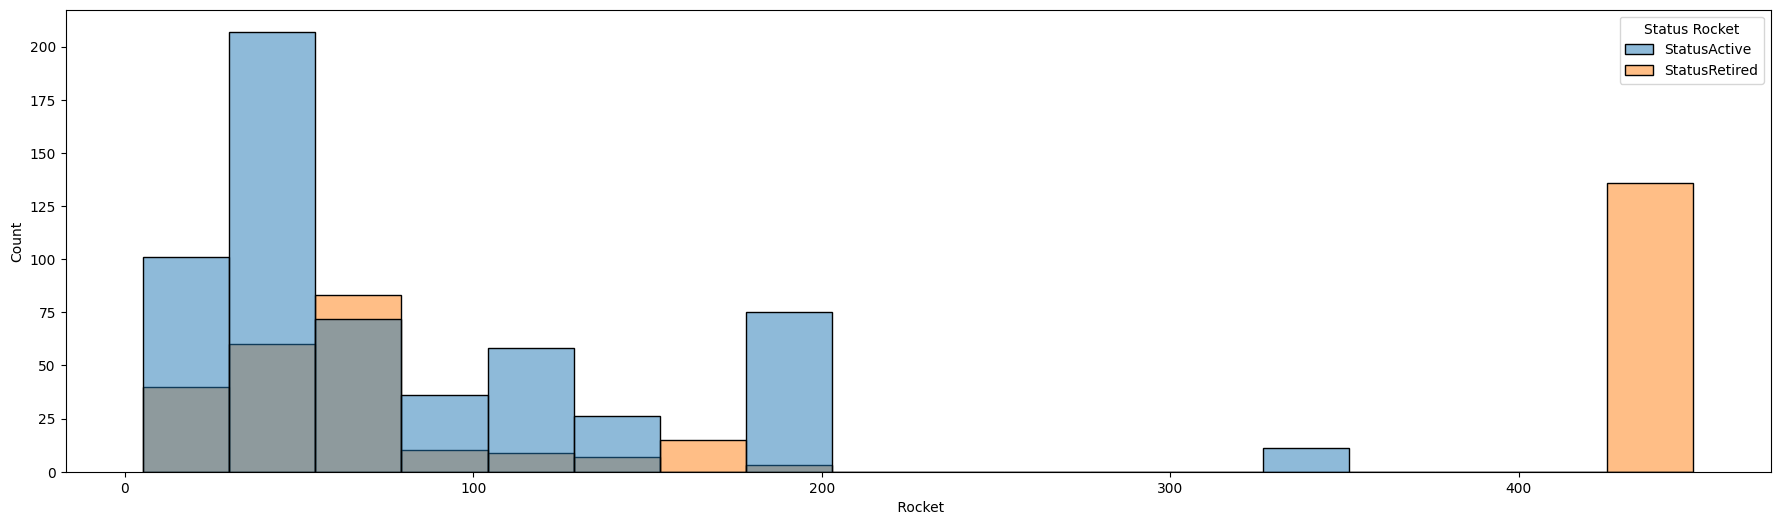

In [23]:
df_d = df_[df_.loc[:," Rocket"]<1000]
plt.figure(figsize=(22,6))
sns.histplot(data=df_d, x=" Rocket", hue="Status Rocket")
plt.show()

## Görev Başarımı ile Maliyet dağılımı

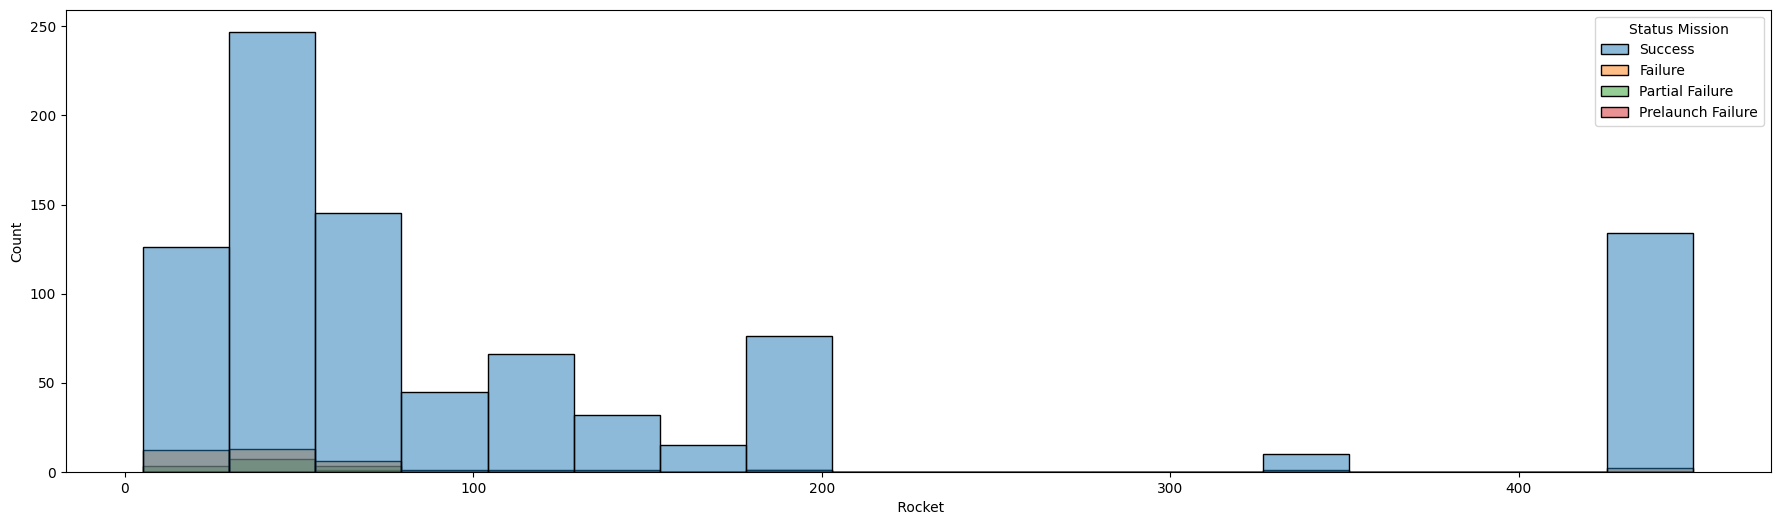

In [24]:
plt.figure(figsize=(22,6))
sns.histplot(data=df_d, x=" Rocket", hue="Status Mission")
plt.show()

## Şirketleri Toplam Maliyeti

In [25]:
df_.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [26]:
df_.groupby(["Company Name"])[" Rocket"].sum()

,Rocket
Company Name,
Arianespace,16345.0
Boeing,1241.0
CASC,6340.26
EER,20.0
ESA,37.0
Eurockot,543.4
ExPace,28.3
ILS,1320.0
ISRO,2177.0


In [27]:
df_.groupby(["Company Name"])[" Rocket"].sum().reset_index()

,Company Name,Rocket
0,Arianespace,16345.0
1,Boeing,1241.0
2,CASC,6340.26
3,EER,20.0
4,ESA,37.0
5,Eurockot,543.4
6,ExPace,28.3
7,ILS,1320.0
8,ISRO,2177.0
9,JAXA,168.0


In [28]:
df_money= df_.groupby(["Company Name"])[" Rocket"].sum().reset_index()
df_money = df_money[df_money[" Rocket"]>0]
df_money.head()

,Company Name,Rocket
0,Arianespace,16345.0
1,Boeing,1241.0
2,CASC,6340.26
3,EER,20.0
4,ESA,37.0


In [29]:
df_money_ = df_money.sort_values(by=[" Rocket"], ascending=False)[:15]
df_money_.head()

,Company Name,Rocket
14,NASA,76280.0
0,Arianespace,16345.0
21,ULA,14798.0
16,RVSN USSR,10000.0
2,CASC,6340.26


In [30]:
fig = px.bar(df_money_,x="Company Name", y=" Rocket", title="Company Money")
fig.show()

## Yıllara göre görev sayıları

In [31]:
df["Datum"] = pd.to_datetime(df["Datum"], errors='coerce')



In [32]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Company Name    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Datum           4198 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Status Rocket   4324 non-null   object             
 5    Rocket         964 non-null    object             
 6   Status Mission  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 236.6+ KB


In [34]:
df["Year"]=df["Datum"].apply(lambda datetime:datetime.year)

In [35]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020.0
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020.0


In [36]:
dataset = df["Year"].value_counts().reset_index()
dataset

,Year,count
0,2018.0,117
1,1971.0,116
2,1975.0,112
3,1976.0,109
4,1977.0,109
...,...,...
59,2010.0,36
60,2012.0,34
61,1958.0,22
62,1959.0,20


In [37]:
fig = px.bar(dataset,x="Year", y="count", title="Missions Number by year")
fig.show()

## Ülkeler ve görev durumu

In [38]:
sf = df["Location"].str.contains("China").value_counts().reset_index()
sf

,Location,count
0,False,4056
1,True,268


In [39]:
sf[sf["Location"] == True]

,Location,count
1,True,268


In [40]:
sfs = df["Location"].str.contains("China").groupby(df["Status Mission"]).value_counts().reset_index()
sfs

,Status Mission,Location,count
0,Failure,False,320
1,Failure,True,19
2,Partial Failure,False,96
3,Partial Failure,True,6
4,Prelaunch Failure,False,4
5,Success,False,3636
6,Success,True,243


In [41]:
sfs.loc[sfs["Location"] == True]

,Status Mission,Location,count
1,Failure,True,19
3,Partial Failure,True,6
6,Success,True,243


In [42]:
df["Status Mission"]

,Status Mission
0,Success
1,Success
2,Success
3,Success
4,Success
...,...
4319,Failure
4320,Success
4321,Failure
4322,Success


In [43]:
encoder = LabelEncoder()
encoder.fit(df["Status Mission"])
encoder

LabelEncoder()

In [44]:
colors = {0:"red",1:"orange",2:"yellow",3:"green"}


In [45]:
colors

{0: 'red', 1: 'orange', 2: 'yellow', 3: 'green'}

In [46]:
countries_dict = {
    "Russia":"Russian Federation",
    "New Mexico":"USA",
    "Yellow Sea":"China",
    "Shahrud Missile Test Site":"Iran",
    "Pacific Missile Range Facility":"USA",
    "Barents Sea":"Russian Federation",
    "Gran Canaria":"USA"

}

In [48]:
df["country"]=df["Location"].str.split(", ").str[-1].replace(countries_dict)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year,Countrs,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020.0,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020.0,China,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020.0,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020.0,Kazakhstan,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020.0,USA,USA


In [51]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [58]:
fig = make_subplots(rows=4, cols=4, subplot_titles=df["country"].unique())
for i, country in enumerate(df['country'].unique()):
    counts = df[df['country'] == country]['Status Mission'].value_counts(normalize = True)*100
    color = [colors[x] for x in encoder.transform(counts.index)]
    trace = go.Bar(x = counts.index, y = counts.values, name = country, marker = {'color': color},showlegend=False)
    fig.add_trace(trace, row = (i//4) + 1, col = (i%4)+1)
fig.update_layout(title = {'text': 'Countries and Mission Status'},height=1000, width=1100)
for i in range(1,5):
    fig.update_yaxes(title_text = 'Percentage', row = i, col = 1)
fig.show()


## Güneş Işığı Haritası analizi

In [60]:
sun = df.groupby(["country","Company Name","Status Mission"])["Datum"].count().reset_index()
sun.head()

,country,Company Name,Status Mission,Datum
0,Australia,AMBA,Success,0
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1


In [64]:
sun = sun[(sun.country=="USA")| (sun.country=="Russian Federation")| (sun.country=="China")| (sun.country=="Iran")| (sun.country=="France")]
sun.head()

,country,Company Name,Status Mission,Datum
7,China,CASC,Failure,13
8,China,CASC,Partial Failure,6
9,China,CASC,Success,230
10,China,CASIC,Failure,0
11,China,CASIC,Success,3


In [65]:
fig = px.sunburst(sun, path=["country","Company Name","Status Mission"], values="Datum",title="Sunburst Chart For some Countries")
fig.show()

## Dünya Haritasında ülkelere göre durum misyonu

In [67]:
country_dict = dict()
for c in countries:
  country_dict[c.name]=c.alpha3
  df["alpha3"]=df["country"]
  df = df.replace({"alpha3": country_dict})
  df.loc[df["country"]=="North Korea","alpha3"]="PRK"
  df.loc[df["country"]=="South Korea","alpha3"]="KOR"
  df.head()



In [68]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year,Countrs,country,alpha3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020.0,USA,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020.0,China,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020.0,USA,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020.0,Kazakhstan,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020.0,USA,USA,USA


In [69]:
mapdf = df.groupby(["country","alpha3"])["Status Mission"].count().reset_index()
mapdf.head()

,country,alpha3,Status Mission
0,Australia,AUS,6
1,Brazil,BRA,3
2,China,CHN,269
3,France,FRA,303
4,India,IND,76


In [70]:
fig = px.choropleth(mapdf, locations="alpha3", color="Status Mission", hover_name="country", title="Mission Status by Country")
fig.show()